<a href="https://colab.research.google.com/github/nvisagan/Project1/blob/master/Contraceptive_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Delivarables
1. Blog post
Required

Choose your own topic and data.
Write a blog post with at least two data visualizations, to communicate insights on your topic.
Publish your post on Medium or your portfolio site.
Don’t use data from Kaggle competitions or popular “toy” datasets.

2. Code
Required

Create Python notebook(s) to wrangle, analyze, and visualize your data.
Push your notebook(s) to your GitHub.
Recommended

Keep it simple. Don’t use machine learning. (You’ll do this in future projects!)

3. Short summary
Required

Describe your project in 280 characters or less.
Choose one data visualization (static image or animated gif) from your blog post.
Annotate your visualization so it’s understandable on its own, without reading your blog post.
Recommended

Share your short project summary on Twitter or LinkedIn, and link to your blog post.

4. Portfolio
Required

Add your short summary to your portfolio site.
Link from your portfolio site to your blog post and code.
Recommended

Host your site with GitHub Pages.
Include your name, bio, and contact info on your site.

In [0]:
import pandas as pd
import matplotlib as plt
import seaborn as sns 

In [0]:
# Load Data 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data"

#Header need to be fixed 
column_headers = ["Wife's age", "Wife's education",
                  "Husband's education", "Number of children ever born",
                  "Wife's religion", "Wife's now working?",
                  "Husband's occupation","Standard-of-living index", 
                  "Media exposure","Contraceptive method used",
                  "Missing Attribute Values"                 
]

contraceptivedf = pd.read_csv(url, names=column_headers)
contraceptivedf.head()

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used,Missing Attribute Values
0,24,2,3,3,1,1,2,3,0,1,NaN
1,45,1,3,10,1,1,3,4,0,1,NaN
2,43,2,3,7,1,1,3,4,0,1,NaN
3,42,3,2,9,1,1,3,3,0,1,NaN
4,36,3,3,8,1,1,3,2,0,1,NaN


In [0]:
contraceptivedf.describe()

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used,Missing Attribute Values
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,0.0
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891,NaN
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376,NaN
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,NaN
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000,NaN
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000,NaN
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000,NaN
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000,NaN


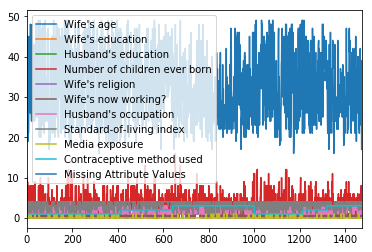

In [0]:
# Lets make some graphs? 
# What should we look at?
contraceptivedf.plot()